# Библиотека TA-Lib

![talib](https://ta-lib.org/assets/images/home.png)

Установить библиотеку можно с сайта pypi.org: https://pypi.org/project/TA-Lib/ 

Обратите внимание на правильное написание библиотеки при установке. На сайте имеется несколько пакетов с походими именами, нам необходим пакет TA-Lib:

```bash
pip install TA-Lib
```

Помимо библиотеки TA-Lib нам так же понадобятся библиотека `mplfinance` для построения графиков и `yfinance` для загрузки исходных данных.

```bash
pip install mplfinance
pip install yfinance
```

In [3]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import datetime as dt

import talib as tb
import yfinance as yf
import mplfinance as mpf


## Загружаем данные

In [4]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2022-01-01'
TEST_START_DATE = '2022-01-01'
TEST_END_DATE = dt.datetime.today().strftime('%Y-%m-%d')

# загружаем данные
df = yf.download('AAPL', start=TRAIN_START_DATE, end=TEST_END_DATE)

[*********************100%%**********************]  1 of 1 completed


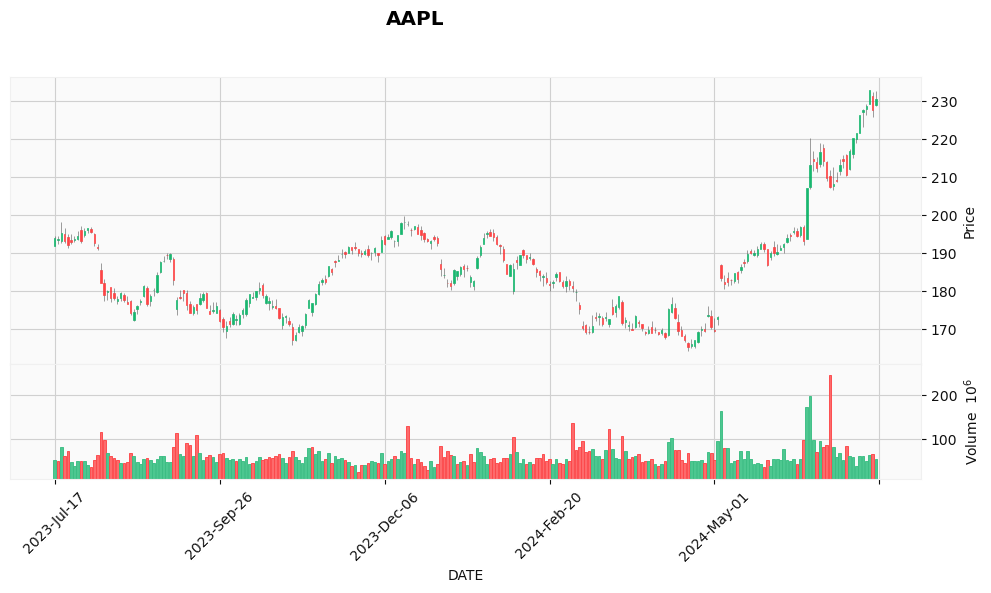

In [5]:
end_day = dt.datetime.today()
start_day = end_day + relativedelta(months=-12)

data = df.loc[(df.index < end_day) & (df.index > start_day)]

mpf.plot(data,
         volume=True,
         style='yahoo',
         type='candle',
         figratio=(22,10),
         title='AAPL',
         ylabel='Price',
        #  savefig='../Presentation/img/volume.png',
         xlabel='DATE')

## Ta-Lib

Включает в себя 158 индикаторов технического анализа собранных в 10 груп для удобства использования.

In [25]:
# позволяет посмотреть группы индикаторов
list(tb.get_function_groups().keys())

['Cycle Indicators',
 'Math Operators',
 'Math Transform',
 'Momentum Indicators',
 'Overlap Studies',
 'Pattern Recognition',
 'Price Transform',
 'Statistic Functions',
 'Volatility Indicators',
 'Volume Indicators']

In [27]:
# выведем все индикаторы по группам:
tb.get_function_groups()
    

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C